### 3. 최근접 이웃 협업 필터링
협업 필터링 : 특정 상품에 대한 선호도가 유사한 고객들은 다른 상품에 대해서도 선호도가 비슷할 것이다’ 라는 가정하에 사용자의 아이템 평가 데이터를 이용해 비슷한 선호도를 갖는 다른 사용자가 선택한 아이템을 추천하는 방식

- 장점
    - 잠재적인 고객 선호도를 추정하여 다양한 상품을 추천할 수 있게 함
    - 사용자가 본인도 몰랐던 새로운 취향을 발견할 수 있음

- 단점
    - 사용자나 아이템의 특징을 사용하지 않기 때문에 사용자와 아이템의 interaction 데이터가 충분히 갖춰져야 시도할 수 있음.
    - 새로운 상품이나 고객이 추가되면 관련 정보가 없기 때문에 추천이 불가능한 cold-start 문제
    - 고객 수나 아이템 수가 너무 많으면 아이템을 구매한 고객 비율이 매우 적어져 추정된 선호도가 정확하지 않을 수도 있음


- 최근접 이웃 기반 협업 필터링 :   
사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은    
사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 방식   

- 주요 목표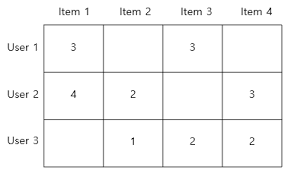
사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로   
사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것

최근접 이웃 방식/잠재 요인 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천 수행

**사용자-아이템 평점 행렬**
- 행 : 개별 사용자
- 열 : 개별 아이템
- 값 : 평점 
- 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때무에 희소 행렬(Sparse Matrix) 특성을 가지고 있음
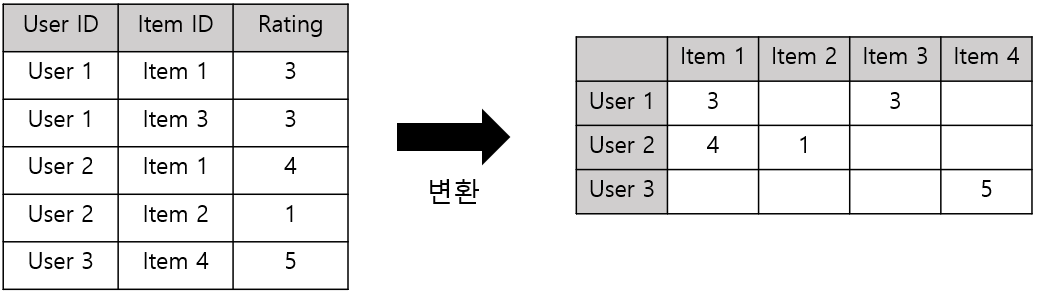


판다스의 pivot_table()같은 함수를 이용해 레코드 레벨 형태 데이터 -> 행렬 형태로 변환 가능

**최근접 이웃 협업 필터링(=메모리 협업 필터링)**
1. 사용자 기반(User-User) : 사용자와 비슷한 고객들이 구매한 상품 추천
    - 특정 사용자와 유사한 다른 사용자들을 TOP-N으로 선정해 이 사용자가 좋아하는 아이템을 추천하는 방식   
    즉, 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자 추출해 그들이 선호하는 아이템 추천
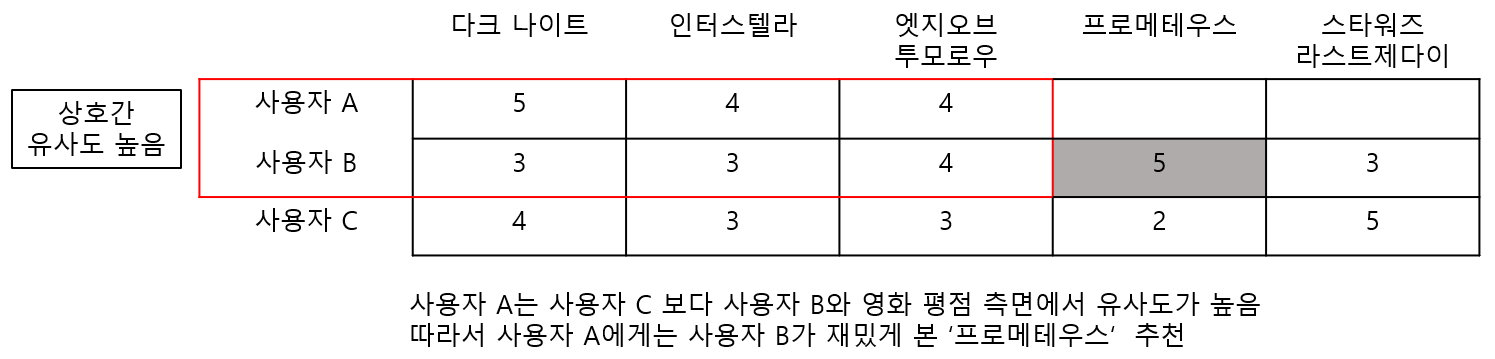


2. 아이템 기반(Item-Item) : 해당 상품을 구매한 고객들의 구매 상품 추천   
아이템 간 속성이 얼마나 비슷한지 기반으로 추천 XXX   
아이템이 가지는 속성과 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘
- 사용자 기반 최근접 이웃 데이터 세트와 행과 열이 서로 반대임
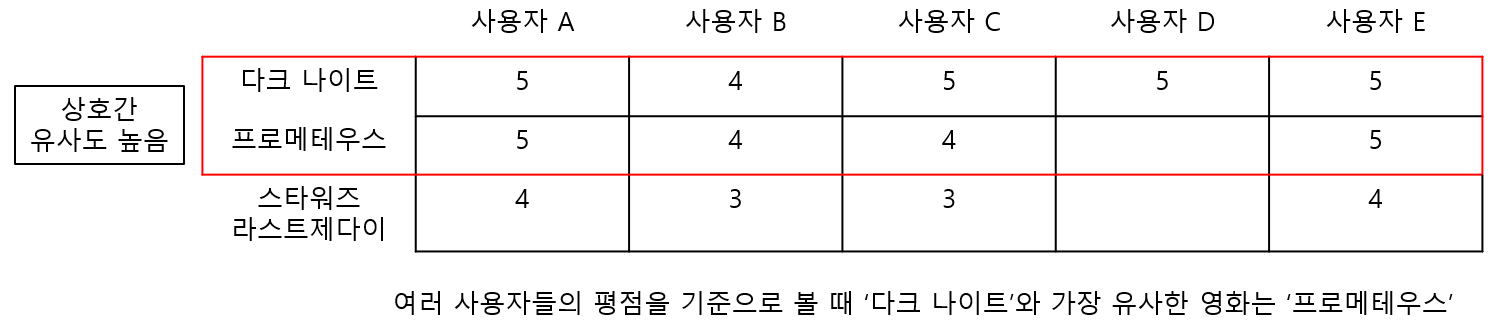


일반적으로 사용자 기반보다는 아이템 기반 협업 필터링의 정확도가 더 높음   
비슷한 영화를 좋아한다고해서 사람들의 취향이 비슷하다고 판단하기 어려운 경우가 많기 때문임 ex) 취향과 관계 없이 유명한 영화를 관람하는 경우 , 평점을 매긴 영화가 많지 않아 비교가 어려운 경우


유사도 측정 : 주로 코사인 유사도 이용

### 6. 아이템 기반 최근접 이웃 협업 필터링 실습

In [42]:
movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')
print(movies.shape) # 영화에 대한 메타 정보인 title, genres 가지고 있는 영화 정보
print(ratings.shape) # 사용자별 영화에 대한 평점 매긴 데이터 세트 ( 0.5~5점 사이 , 0.5점 단위로 부여 )

(9742, 3)
(100836, 4)


In [44]:
# 헹 레벨 형태의 원본 데이터 세트를 사용자를 로우로 , 영화를 칼럼으로 구성한 데이터 세트로 변경
# pivot_table() 함수 이용
ratings = ratings[['userId','movieId','rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)
# 사용자가 평점을 매기지 않은 영화는 NaN으로 할당됨 

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# NaN값 -> 0으로 변환 & 칼럼명을 영화명으로 변경
ratings_movies = pd.merge(ratings, movies, on='movieId')

ratings_matrix = ratings_movies.pivot_table('rating', index='userId', columns='title')

ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 영화 간 유사도 산출
코사인 유사도를 기반으로 영화 간의 유사도 측정

cosine_similarity()는 행을 기준으로 서로 다른 행을 비교해 유사도 산출   
ratings_matrix는 userId가 기준인 행 레벨 데이터이므로 여기에 cosine_similarity() 적용 시 사용자 간 유사도 만들어짐   
ratings_matrix 전치 행렬 변경 필요

In [46]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# 영화의 코사인 유사도 구하기

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns = ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [48]:
# 영화 대부와 유사도 높은 상위 5개 영화 추출
item_sim_df['Godfather, The (1972)'].sort_values(ascending=False)[:6]
# 스타워즈와 같이 장르가 완전히 다른 영화도 유사도가 높게 나타남

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [49]:
# 인셉션과 유사도 높은 영화 찾기
item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:6]
# 만들어진 아이템 기반 유사도 데이터는 사용자의 평점 정보를 모두 취합해 영화에 따른 유사한 다른 영화 추천할 수 있게 해줌

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

#### 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천
앞의 예제는 개인적 취향을 반영하지 않고 영화 간의 유사도만을 가지고 추천한 것임   
개인화된 영화 추천 -> 개인이 아직 관람하지 않은 영화 추천 ! 

아직 관람하지 않은 영화에 대해 아이템 유사도와 기존 관람한 영화의 평점 데이터 기반으로 새롭게 모든 영화의 예측 평점 계산 후 높은 예측 평점 가진 영화 추천
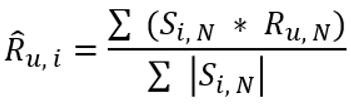
$\hat{R}_{u,i}$: 사용자 u, 아이템 i의 개인화된 예측 평점 값   
$S_{i,N}$: 아이템 i와 가장 유사도가 높은 Top-N개 아이템의 유사도 벡터   
$R_{u,N}$: 사용자 u의 아이템 i와 가장 유사도가 높은 Top-N개 아이템에 대한 실제 평점 벡터   
N : 아이템의 최근접 이웃 범위 계수 의미 / 특정 아이템과 유사도가 가장 높은 Top-N개의 다른 아이템 추출하는데 사용

In [54]:
# 사용자-영화 평점 넘파이 행렬과 영화 간 유사도를 가지는 넘파이 행렬을 입력받고 이를 위 식으로 개인화된 예측 평점 계산하는 함수 생성
def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [55]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)
# 사용자별 영화의 실제 평점과 영화의 코사인 유사도를 내적한 값이므로 기존에 관람하지 않았던 영화도 값이 부여되는 경우 발생

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [56]:
# 예측 결과가 원래 실제 평점과 얼마나 차이가 있는지 확인 (MSE 사용)
# 기존에 평점이 부여된 데이터에 대해서만 오차 정도 측정
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print(get_mse(ratings_pred, ratings_matrix.values))

9.895354759094706


In [57]:
# MSE 감소시키는 방향으로 개선하기
# 특정 영화와 가장 비슷한 유사도를 가지는 영화에 대해서만 유사도 벡터 적용하는 함수로 변경
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    pred = np.zeros(ratings_arr.shape)
    
    for col in range(ratings_arr.shape[1]):
        top_n_items = [np.argsort(item_sim_arr[:,col])[:-n-1:-1]]
        
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row,:][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col,:][top_n_items]))

    return pred

In [58]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print(get_mse(ratings_pred, ratings_matrix.values))

ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index, columns=ratings_matrix.columns)
# 기존보다 많이 향상됨

3.6949999176225483


In [59]:
# 특정 사용자에 대해 영화 추천
# 9번 사용자가 어떤 영화를 좋아하는지 사용자가 평점을 준 영화를 평점 높은 순으로 나열
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id>0].sort_values(ascending=False)[:10]
# 전반적으로 흥행성이 좋은 영화에 높은 평점 줌 

title
Adaptation (2002)                                                                 5.0
Austin Powers in Goldmember (2002)                                                5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Producers, The (1968)                                                             5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Back to the Future (1985)                                                         5.0
Glengarry Glen Ross (1992)                                                        4.0
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                     4.0
Name: 9, dtype: float64

In [60]:
# 사용자가 이미 평점 준 영화 제외하고 추천할 수 있도록 
# 평점 주지 않은 영화 리스트 객체로 반환하는 함수 생성
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId,:]
    # 기존 관람한 영화 인덱스 추출
    already_seen = user_rating[user_rating > 0].index.tolist()
    
    movies_list = ratings_matrix.columns.tolist()
    
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [61]:
# 최종적으로 영화 추천 함수 생셩
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

unseen_list = get_unseen_movies(ratings_matrix,9)

recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

recomm_movies = pd.DataFrame(data=recomm_movies.values , index=recomm_movies.index, columns=['pred_score'])

recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591
